<img src=".\images\Logo.png" width=150 align="left" /> <img src=".\images\Logo2.jpg" width=450 align="right" />


# <center><font color= #1e8449 > <b>CU25_Modelo de gestión de Lista de Espera Quirúrgica</font></center>

<font color='steelblue'><b>Citizenlab Data Science Methodology > II - Data Processing Domain </font>
***
> # <font color='steelblue'> <b>09.3.- Data Cleansing - Outliers</font>

<font color='steelblue'>Data Cleaning refers to identifying and correcting (or removing) errors in the dataset that may negatively impact a predictive model, replacing, modifying, or deleting the dirty or coarse data.</font>

## <font color='steelblue'>Tasks</font>

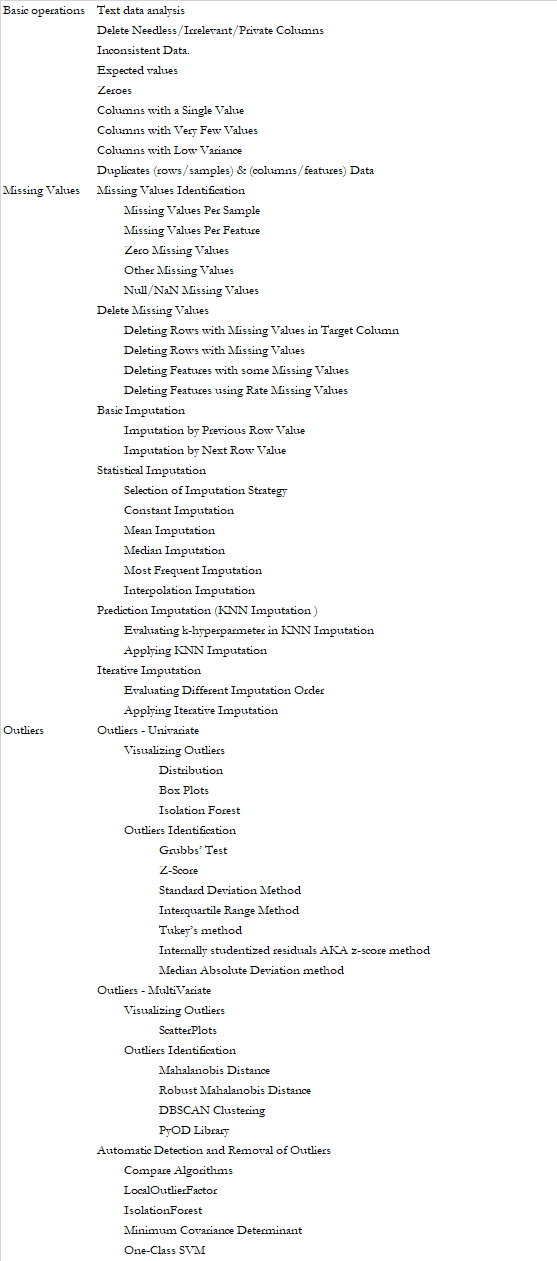


## Consideraciones casos CitizenLab programados en R

* La mayoría de las tareas de este proceso se han realizado en los notebooks del proceso 05 Data Collection porque eran necesarias para las tareas ETL. En esos casos, en este notebook se referencia al notebook del proceso 05 correspondiente
* Por tanto en los notebooks de este proceso de manera general se incluyen las comprobaciones necesarias, y comentarios si procede
* Las tareas del proceso se van a aplicar solo a los archivos que forman parte del despliegue, ya que hay muchos archivos intermedios que no procede pasar por este proceso
* El nombre de archivo del notebook hace referencia al nombre de archivo del proceso 05 al que se aplica este proceso, por eso pueden no ser correlativa la numeración
* Las comprobaciones se van a realizar teniendo en cuenta que el lenguaje utilizado en el despliegue de este caso es R

## <font color='green'>File</font>

- <font color='steelblue'> <b>Input File:CU_25_09.2_01_lista_espera_completo_clean_v_01 </font>
- <font color='steelblue'> <b>Output File: No aplica</font>

### Encoding

Con la siguiente expresión se evitan problemas con el encoding al ejecutar el notebook. Es posible que deba ser eliminada o adaptada a la máquina en la que se ejecute el código.

In [137]:
Sys.setlocale(category = "LC_ALL", locale = "es_ES.UTF-8")

[1] "LC_COLLATE=es_ES.UTF-8;LC_CTYPE=es_ES.UTF-8;LC_MONETARY=es_ES.UTF-8;LC_NUMERIC=C;LC_TIME=es_ES.UTF-8"

## <font color='green'>Settings</font>

### Libraries to use

In [138]:
library(readr)
library(dplyr)
library(sf)
library(tidyr)
library(stringr)
library(ggplot2)
library(extremevalues)
library(dbscan)

### Paths

In [139]:
iPath <- "Data/Input/"
oPath <- "Data/Output/"

## <font color='green'>Data Load</font>

<font color='tomato'><b> OPCION A:</b> Seleccionar fichero en ventana para mayor comodidad</font> 

Data load using the {tcltk} package. Ucomment the line if using this option

In [140]:
# file_data <- tcltk::tk_choose.files(multi = FALSE)

<font color='tomato'><b> OPCION B:</b> Especificar el nombre de archivo</font>



In [141]:
iFile <- "CU_25_09.2_01_lista_espera_completo_clean_v_01.csv"
file_data <- paste0(iPath, iFile)

if(file.exists(file_data)){
    cat("Se leerán datos del archivo: ", file_data)
} else{
    warning("Cuidado: el archivo no existe.")
}


Se leerán datos del archivo:  Data/Input/CU_25_09.2_01_lista_espera_completo_clean_v_01.csv

#### Data file to dataframe

Usar la función adecuada según el formato de entrada (xlsx, csv, json, ...)

In [142]:
data <- read.csv(file_data)


Rows: 55216 Columns: 46
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (6): Hospital, Especialidad, nombre_area, Municipio, Clase, Dependencia
dbl (39): total_pacientes, ano, semana, CODCNH, id_area, cmunicipio, CAMAS, ...
lgl  (1): is_train

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


<font color='tomato'>Visualizo los datos.</font>

Estructura de  los datos:

In [143]:
data |> glimpse()

Rows: 55,216
Columns: 46
$ Hospital          <chr> "HOSPITAL REY JUAN CARLOS", "HOSPITAL CENTRAL DE LA …
$ Especialidad      <chr> "UROLOGÍA", "ODONTOESTOMATOLOGÍA", "GINECOLOGÍA", "D…
$ total_pacientes   <dbl> 344, 0, 52, 37, 0, 4, 0, 718, 0, 271, 108, 0, 34, 86…
$ ano               <dbl> 2021, 2020, 2021, 2021, 2021, 2020, 2021, 2020, 2021…
$ semana            <dbl> 30, 36, 49, 23, 3, 5, 50, 7, 35, 1, 42, 10, 21, 33, …
$ CODCNH            <dbl> 281348, 280724, 281292, 281292, 281236, 280724, 2807…
$ id_area           <dbl> 8, 7, 11, 11, 11, 7, 3, 6, 1, 2, 2, 8, 11, 11, 1, 3,…
$ nombre_area       <chr> "SUR-OESTE I", "CENTRO-OESTE", "SUR II", "SUR II", "…
$ cmunicipio        <dbl> 280920, 280796, 280133, 280133, 281610, 280796, 2800…
$ Municipio         <chr> "MÓSTOLES", "MADRID", "ARANJUEZ", "ARANJUEZ", "VALDE…
$ CAMAS             <dbl> 382, 475, 98, 98, 182, 475, 507, 613, 269, 1143, 156…
$ Clase             <chr> "HOSPITALES GENERALES", "HOSPITALES GENERALES", "HOS…
$ Dependencia  

Muestra de los primeros datos:

In [144]:
data |> slice_head(n = 5)

Hospital,Especialidad,total_pacientes,ano,semana,CODCNH,id_area,nombre_area,cmunicipio,Municipio,⋯,t9_1,t10_1,t11_1,t12_1,capacidad,pacientes,consultas,hospitalizaciones,Target,is_train
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
HOSPITAL REY JUAN CARLOS,UROLOGÍA,344,2021,30,281348,8,SUR-OESTE I,280920,MÓSTOLES,⋯,0.3348780,0.1369254,0.5072726,0.5849309,17,1447,573,12,54.45,TRUE
HOSPITAL CENTRAL DE LA DEFENSA GOMEZ ULLA,ODONTOESTOMATOLOGÍA,0,2020,36,280724,7,CENTRO-OESTE,280796,MADRID,⋯,0.4914365,0.1217100,0.4915713,0.5597213,0,1211,45,0,0.00,TRUE
HOSPITAL UNIVERSITARIO DEL TAJO,GINECOLOGÍA,52,2021,49,281292,11,SUR II,280133,ARANJUEZ,⋯,0.3346063,0.1517321,0.5024130,0.5900028,8,1293,108,2,37.96,TRUE
HOSPITAL UNIVERSITARIO DEL TAJO,DERMATOLOGÍA,37,2021,23,281292,11,SUR II,280133,ARANJUEZ,⋯,0.3346063,0.1517321,0.5024130,0.5900028,5,1501,103,2,23.14,TRUE
HOSPITAL UNIVERSITARIO INFANTA ELENA,ODONTOESTOMATOLOGÍA,0,2021,3,281236,11,SUR II,281610,VALDEMORO,⋯,0.3346063,0.1517321,0.5024130,0.5900028,0,1240,44,0,0.00,TRUE


## Outliers - Univariate

### Visualizing Outliers

#### Distribution

<font color='tomato'>Selecting feature to analyze</font>

In [145]:

# Select the column you want to visualize

column_name <- "capacidad"



<font color='darkgrey'><b>Operation</font>

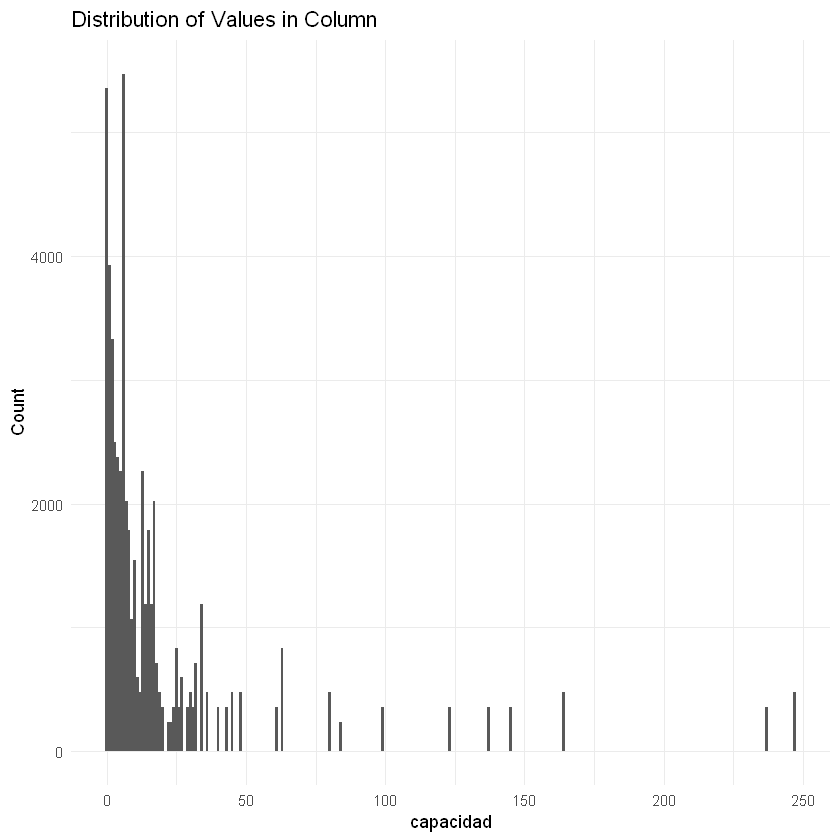

In [146]:
# Create a histogram plot
ggplot(data, aes(x = data[[column_name]])) +
  geom_histogram(binwidth = 1) +
  labs(x = column_name, y = "Count") +
  ggtitle("Distribution of Values in Column") +
  theme_minimal()

#### Box Plots
Are great to summarize and visualize the distribution of variables easily and quickly.

<font color='tomato'>Selecting feature to analyze</font>

In [147]:
# Selecting feature to analyze
column_name <- "capacidad"

<font color='darkgrey'><b>Operation</font>

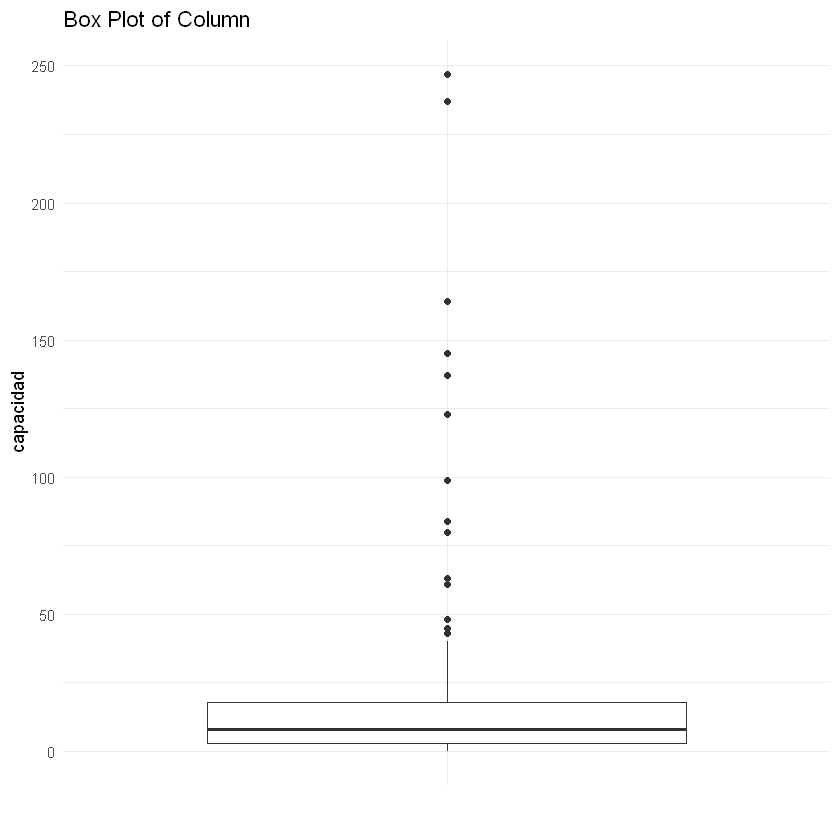

In [148]:
# Analyze specifics features
# Create a box plot
ggplot(data, aes(x = "", y = data[[column_name]])) +
  geom_boxplot() +
  labs(x = "", y = column_name) +
  ggtitle("Box Plot of Column") +
  theme_minimal()

#### Isolation Forest

<font color='tomato'>Selecting feature to analyze</font>

In [149]:
# Selecting feature to analyze
column_name <- "capacidad"


<font color='darkgrey'><b>Operation</font>

### Outliers Identification

#### Grubbs’ Test

<font color='tomato'>Selecting feature to analyze</font>

In [150]:
# Selecting feature to analyze
column_name <- "capacidad"

<font color='darkgrey'><b>Operation</font>

In [151]:
outliers <- grubbs.test(data[[column_name]], opposite = FALSE)
print(outliers)


	Grubbs test for one outlier

data:  data[[column_name]]
G = 5.84134, U = 0.99938, p-value = 0.0001422
alternative hypothesis: highest value 247 is an outlier



#### Z-Score

<font color='tomato'>Selecting feature to analyze</font>

In [152]:
# Selecting feature to analyze
column_name <- "capacidad"

<font color='darkgrey'><b>Operation</font>

In [153]:
# Define a threshold to identify an outlier.
# List of row numbers with outlier 
# Choose the numeric column from your data

# Calculate the z-score
z_scores <- scale(column_name)

# Define a threshold for identifying outliers (e.g., z-score > 5 or z-score < -5)
threshold <- 5

# Find the row numbers with z-scores exceeding the threshold
outlier_rows <- which(abs(z_scores) > threshold)

# Print the row numbers with outliers
print(outlier_rows)

ERROR: Error in colMeans(x, na.rm = TRUE): 'x' must be numeric


#### Standard Deviation Method

<font color='tomato'>Selecting num of std</font>

<font color='darkgrey'><b>Operation</font>

In [ ]:
# Selecting feature to analyze
column_name <- "capacidad"

In [ ]:
# identify outliers with standard deviation
# Choose the numeric column from your data
column_name_df <- data[[column_name]]

# Calculate the mean and standard deviation of the column
column_mean <- mean(column_name_df)
column_sd <- sd(column_name_df)

# Define the threshold as a multiple of the standard deviation (e.g., 3 times the standard deviation)
threshold <- 3

# Identify the outliers based on the threshold
outliers <- column_name_df > (column_mean + threshold * column_sd) | column_name_df < (column_mean - threshold * column_sd)

# Remove the outliers from the column
column_name_df[!outliers] <- NA

# Print the updated column with outliers removed
print(column_name_df)

    [1]  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA
   [19]  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA
   [37] 164  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA
   [55]  NA  NA 164  NA  NA  NA  NA 145  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA
   [73]  NA  NA  NA  NA  NA  NA  NA  NA 164  NA  NA  NA  NA  NA  NA  NA  NA  NA
   [91]  NA 164  NA  NA  NA  NA 237  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA
  [109]  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA
  [127]  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA
  [145]  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA 247  NA  NA  NA  NA
  [163]  NA  NA  NA  NA  NA  NA  NA  NA  NA 145  NA 164 247 247 164  NA  NA  NA
  [181]  NA  NA  NA  NA  NA  NA  NA 247 145 237  NA  NA  NA  NA  NA  NA  NA  NA
  [199]  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA
  [217]  NA  NA  NA  NA  NA  NA  NA  NA 

#### Interquartile Range Method

<font color='tomato'>Selecting factor k</font>

In [ ]:
# Selecting feature to analyze
column_name <- "capacidad"

In [ ]:
# Selecting factor k
# Define the threshold as a multiplier of the IQR (e.g., 1.5 times the IQR)
threshold <- 1.5

<font color='darkgrey'><b>Operation</font>

In [ ]:
# Choose the numeric column from your data
column_name_df <- data[[column_name]]

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 <- quantile(column_name_df, 0.25)
Q3 <- quantile(column_name_df, 0.75)

# Calculate the IQR (Interquartile Range)
IQR <- Q3 - Q1



# Identify the outliers based on the threshold
outliers <- column_name_df < (Q1 - threshold * IQR) | column_name_df > (Q3 + threshold * IQR)

# Remove the outliers from the column
column_name_df[!outliers] <- NA

# Print the updated column with outliers removed
print(column_name_df)


    [1]  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  63  NA
   [19]  NA  43  NA  63  NA  NA  NA  NA  48  NA  NA  NA  NA  NA  NA  NA  NA  NA
   [37] 164  NA  NA  NA  NA  NA  NA  NA  NA  NA  61  NA  NA  NA  NA  NA  45  NA
   [55]  NA  99 164  NA  NA  NA 123 145  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA
   [73]  NA  NA  NA  NA  NA  NA  NA  NA 164  45  NA  NA  NA  NA  NA  NA  NA  NA
   [91]  NA 164  NA  NA  NA  NA 237  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA
  [109]  NA  NA  NA  NA  NA  NA  NA  45  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA
  [127]  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  43  NA  NA  NA  NA  NA  NA  NA
  [145]  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA 247  NA  NA  NA  NA
  [163]  NA  NA  NA  NA  NA  NA  61  NA  NA 145  NA 164 247 247 164  NA  NA  NA
  [181]  NA  NA  NA  NA  NA  NA  80 247 145 237  NA  NA  NA  NA  NA  NA  NA  NA
  [199]  NA  NA  NA  NA  NA  NA 123  NA  NA  NA  80  63  NA  NA  63  NA  NA  NA
  [217]  61  NA  NA  NA  NA  NA  NA  NA 

#### Tukey’s method

In [ ]:
# Selecting feature to analyze
column_name <- "capacidad"

In [ ]:
#Tukey's method
column_name_df <- data[[column_name]]
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 <- quantile(column_name_df, 0.25)
Q3 <- quantile(column_name_df, 0.75)

# Calculate the interquartile range (IQR)
IQR <- Q3 - Q1

# Define the multiplier for Tukey's method (e.g., 1.5 times the IQR)
multiplier <- 1.5

# Calculate the lower and upper bounds for outliers
lower_bound <- Q1 - multiplier * IQR
upper_bound <- Q3 + multiplier * IQR

# Identify the outliers based on the bounds
outliers <- column_name_df < lower_bound | column_name_df > upper_bound

# Remove the outliers from the column
column_name_df[!outliers] <- NA

# Print the updated column with outliers removed
print(column_name_df)

    [1]  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  63  NA
   [19]  NA  43  NA  63  NA  NA  NA  NA  48  NA  NA  NA  NA  NA  NA  NA  NA  NA
   [37] 164  NA  NA  NA  NA  NA  NA  NA  NA  NA  61  NA  NA  NA  NA  NA  45  NA
   [55]  NA  99 164  NA  NA  NA 123 145  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA
   [73]  NA  NA  NA  NA  NA  NA  NA  NA 164  45  NA  NA  NA  NA  NA  NA  NA  NA
   [91]  NA 164  NA  NA  NA  NA 237  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA
  [109]  NA  NA  NA  NA  NA  NA  NA  45  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA
  [127]  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  43  NA  NA  NA  NA  NA  NA  NA
  [145]  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA 247  NA  NA  NA  NA
  [163]  NA  NA  NA  NA  NA  NA  61  NA  NA 145  NA 164 247 247 164  NA  NA  NA
  [181]  NA  NA  NA  NA  NA  NA  80 247 145 237  NA  NA  NA  NA  NA  NA  NA  NA
  [199]  NA  NA  NA  NA  NA  NA 123  NA  NA  NA  80  63  NA  NA  63  NA  NA  NA
  [217]  61  NA  NA  NA  NA  NA  NA  NA 

#### Internally studentized residuals AKA z-score method

In [ ]:
# Selecting feature to analyze
column_name <- "capacidad"

In [ ]:
#Internally studentized method (z-score)
# Calculate the z-scores for each data point
column_name_df <- data[[column_name]]
z_scores <- scale(column_name_df)

# Define a threshold for identifying outliers (e.g., z-score > 3 or z-score < -3)
threshold <- 3

# Identify the outliers based on the z-scores
outliers <- abs(z_scores) > threshold

# Remove the outliers from the column by replacing them with NA
column_name_df[outliers] <- NA

# Print the updated column with outliers removed
print(column_name_df)

    [1]  17   0   8   5   0   5   1  24   6   6  30   4   2  15  20   6  63  15
   [19]   1  43   6  63   7   6   3  18  48   6  17  14   0  14  10  15  17  18
   [37]  NA  16   4   0   6   6   2  11   6   6  61  12  15   0   1   0  45   1
   [55]  34  99  NA   6  15  13 123  NA   0   6   2   5   1   7   0   0   0   6
   [73]  17   3   0  25   6   4   1  18  NA  45  15   1   0   8  17  15   0   4
   [91]   9  NA   1  13   1   6  NA   1   0   2  15  15  29  10   8  17  13  12
  [109]   2  34  24   8  13   3  15  45   7   2   1  34  25   6  34   0   6  17
  [127]  16   1  16  13  25  26   2   0   3   4  43   9  10  34  25   4   2   1
  [145]   6  16  13   6   0   6   1  13  15  14  40   0  31  NA   4   2  31   3
  [163]  34  19   6   7   2   5  61   3   0  NA   4  NA  NA  NA  NA   4   6   6
  [181]  14   8   1  15   6  24  80  NA  NA  NA   1   7  14   6   0   6   6   2
  [199]  15  31  14   4  12  11 123  19  10   5  80  63  34   0  63   0   6   2
  [217]  61   1  34   4  34  11   7  19 

#### Median Absolute Deviation method

In [ ]:
# Selecting feature to analyze
column_name <- "capacidad"

In [ ]:
#MAD method
column_name_df <- data[[column_name]]
# Calculate the median absolute deviation (MAD)
mad <- median(abs(column_name_df - median(column_name_df, na.rm = TRUE)), na.rm = TRUE)

# Define a threshold for identifying outliers (e.g., 3 times the MAD)
threshold <- 3 * mad

# Identify the outliers based on the MAD
outliers <- abs(column_name_df - median(column_name_df, na.rm = TRUE)) > threshold

# Remove the outliers from the column by replacing them with NA
column_name_df[outliers] <- NA

# Print the updated column with outliers removed
print(column_name_df)

    [1] 17  0  8  5  0  5  1 24  6  6 NA  4  2 15 20  6 NA 15  1 NA  6 NA  7  6
   [25]  3 18 NA  6 17 14  0 14 10 15 17 18 NA 16  4  0  6  6  2 11  6  6 NA 12
   [49] 15  0  1  0 NA  1 NA NA NA  6 15 13 NA NA  0  6  2  5  1  7  0  0  0  6
   [73] 17  3  0 25  6  4  1 18 NA NA 15  1  0  8 17 15  0  4  9 NA  1 13  1  6
   [97] NA  1  0  2 15 15 29 10  8 17 13 12  2 NA 24  8 13  3 15 NA  7  2  1 NA
  [121] 25  6 NA  0  6 17 16  1 16 13 25 26  2  0  3  4 NA  9 10 NA 25  4  2  1
  [145]  6 16 13  6  0  6  1 13 15 14 NA  0 NA NA  4  2 NA  3 NA 19  6  7  2  5
  [169] NA  3  0 NA  4 NA NA NA NA  4  6  6 14  8  1 15  6 24 NA NA NA NA  1  7
  [193] 14  6  0  6  6  2 15 NA 14  4 12 11 NA 19 10  5 NA NA NA  0 NA  0  6  2
  [217] NA  1 NA  4 NA 11  7 19 NA  6 11 NA  8  0  3 24  5 NA NA  0  0  1 18 NA
  [241]  9  6  6 NA NA  0 NA 15 15  4  4  0  4  1 NA  6  0  7  5  2 15  0 17 11
  [265]  2 13 16  0  6  6  6 NA 17 26 NA  5 26 NA  1  5  0  6 15 10  2  0 14 18
  [289]  3  9 NA  0  6 13 15  5 19  9 15

## Outliers - MultiVariate

### Visualizing Outliers
ScatterPlots: a common way to plot multivariate outliers is the scatter plot.

#### ScatterPlots
A common way to plot multivariate outliers is the scatter plot.

In [ ]:
# Selecting feature to analyze
column_name <- "capacidad"

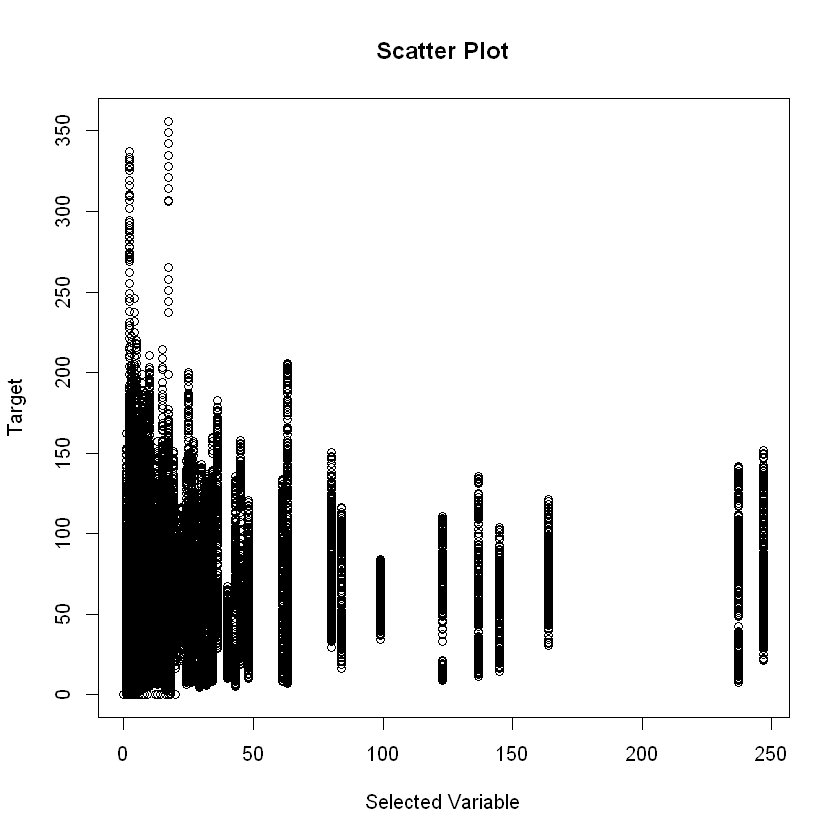

In [ ]:
plot(data[[column_name]], data$Target, xlab = "Selected Variable", ylab = "Target", main = "Scatter Plot")


<font color='tomato'>Selecting feature to analyze</font>

In [ ]:
# Selecting feature to analyze
# Selecting feature to analyze
colnames(data)
numeric_data <- data[, c("pacientes", "Target")]

[1] "Hospital"          "Especialidad"      "total_pacientes"  
 [4] "ano"               "semana"            "CODCNH"           
 [7] "id_area"           "nombre_area"       "cmunicipio"       
[10] "Municipio"         "CAMAS"             "Clase"            
[13] "Dependencia"       "TAC"               "RM"               
[16] "GAM"               "HEM"               "ASD"              
[19] "ALI"               "SPECT"             "MAMOS"            
[22] "DO"                "DIAL"              "X"                
[25] "Y"                 "t3_1"              "t1_1"             
[28] "t2_1"              "t2_2"              "t4_1"             
[31] "t4_2"              "t4_3"              "t5_1"             
[34] "t6_1"              "t7_1"              "t8_1"             
[37] "t9_1"              "t10_1"             "t11_1"            
[40] "t12_1"             "capacidad"         "pacientes"        
[43] "consultas"         "hospitalizaciones" "Target"           
[46] "is_train"

### Outliers Identification

#### Mahalanobis Distance

In [ ]:
cov_matrix <- cov(numeric_data)
inv_cov_matrix <- solve(cov_matrix)
means <- colMeans(numeric_data)
mahalanobis_dist <- mahalanobis(numeric_data, means, inv_cov_matrix)
print(mahalanobis_dist)


    [1] 2.786935e+05 4.689896e+08 1.996270e+08 2.364838e+07 3.620721e+08
    [6] 2.801364e+07 2.707724e+07 6.158992e+07 4.969851e+06 2.306198e+07
   [11] 3.673834e+08 3.370998e+07 6.415123e+07 1.785578e+08 5.338657e+07
   [16] 1.748903e+07 8.839004e+07 4.818668e+07 1.140442e+08 1.099392e+08
   [21] 4.076351e+07 4.776252e+07 8.415082e+06 1.188910e+08 1.445128e+08
   [26] 1.465355e+07 7.269311e+07 3.956205e+06 5.789353e+06 1.800875e+06
   [31] 3.029493e+07 6.965467e+06 1.462558e+08 5.668737e+08 4.614874e+07
   [36] 1.004639e+08 1.020908e+07 4.636551e+07 1.492011e+08 1.340296e+08
   [41] 7.084106e+06 5.371888e+06 5.915673e+07 1.223790e+08 7.719978e+07
   [46] 7.435905e+07 1.634294e+07 3.757409e+06 8.205468e+06 4.217382e+06
   [51] 3.878034e+06 1.316224e+07 1.508014e+08 2.013469e+08 1.845670e+08
   [56] 1.178200e+08 3.866495e+06 2.897595e+06 1.757340e+07 6.492379e+07
   [61] 1.970678e+06 3.523711e+06 1.987939e+08 8.634255e+07 1.001104e+07
   [66] 5.393038e+07 8.835257e+06 2.227934e+06 4.62

<font color='darkgrey'><b>Operation</font>

In [ ]:
# Analyze selected features


In [ ]:
# Analyze all dataset


#### DBSCAN Clustering

<font color='tomato'>Selecting feature to analyze</font>

In [ ]:
# Selecting feature to analyze
column_name <- c("capacidad","Target")

<font color='darkgrey'><b>Operation</font>

In [ ]:
# Select the numeric columns from the data frame
numeric_data <- data[, column_name]

# Perform DBSCAN clustering on the numeric data
dbscan_result <- dbscan(numeric_data, eps = 0.5, minPts = 5)

# Extract the cluster labels assigned by DBSCAN
cluster_labels <- dbscan_result$cluster




In [ ]:
# Index of rows with outliers
# Identify the outliers as points that are not assigned to any cluster (noise points)
outlier_indices <- which(cluster_labels == 0)
outlier_indices

[1]    14    36    48    80    82    97   127   132   170   174   176   186
  [13]   210   229   232   234   240   267   272   278   297   303   316   371
  [25]   393   416   419   465   469   476   489   499   500   504   505   509
  [37]   513   517   531   533   537   560   563   572   594   599   603   604
  [49]   618   645   646   669   678   723   732   748   752   765   794   801
  [61]   803   805   811   852   863   891   904   909   918   936   939   941
  [73]   943   962   979   988   999  1018  1032  1052  1055  1089  1090  1096
  [85]  1097  1102  1113  1125  1129  1131  1133  1152  1165  1184  1186  1188
  [97]  1191  1192  1194  1215  1232  1235  1240  1271  1273  1278  1281  1296
 [109]  1307  1324  1328  1391  1432  1437  1449  1459  1460  1464  1472  1491
 [121]  1493  1508  1509  1534  1537  1538  1542  1546  1563  1581  1599  1614
 [133]  1621  1644  1646  1657  1670  1681  1693  1722  1724  1732  1733  1736
 [145]  1741  1759  1768  1782  1792  1850  1859  1861  1880  1887  1896  1903
 [157]  1906  1907  1912  1918  1928  1939  1965  1972  1976  1978  1982  2011
 [169]  2017  2028  2058  2083  2093  2105  2140  2151  2175  2181  2200  2204
 [181]  2208  2237  2238  2244  2250  2264  2298  2309  2311  2324  2331  2339
 [193]  2348  2358  2362  2412  2415  2419  2423  2435  2443  2470  2475  2483
 [205]  2490  2521  2537  2540  2547  2549  2562  2568  2577  2583  2593  2600
 [217]  2612  2614  2695  2697  2707  2724  2729  2733  2745  2758  2773  2794
 [229]  2795  2814  2841  2853  2876  2879  2888  2906  2941  2946  2962  2975
 [241]  2978  2996  3000  3015  3016  3024  3038  3039  3040  3042  3066  3070
 [253]  3081  3085  3091  3128  3152  3176  3178  3190  3203  3214  3228  3231
 [265]  3243  3250  3251  3262  3270  3275  3278  3296  3310  3316  3325  3332
 [277]  3344  3349  3363  3375  3386  3407  3408  3411  3445  3466  3469  3474
 [289]  3478  3484  3491  3492  3502  3513  3516  3542  3543  3552  3572  3578
 [301]  3580  3583  3594  3599  3600  3611  3620  3632  3634  3635  3648  3659
 [313]  3660  3669  3691  3706  3711  3717  3720  3728  3740  3743  3750  3758
 [325]  3760  3776  3814  3826  3834  3844  3854  3893  3919  3943  3944  3978
 [337]  3983  3999  4010  4032  4041  4047  4057  4059  4063  4064  4092  4105
 [349]  4120  4123  4128  4131  4174  4177  4185  4192  4206  4211  4216  4227
 [361]  4231  4248  4281  4285  4287  4312  4317  4318  4320  4334  4342  4343
 [373]  4361  4370  4373  4408  4418  4430  4437  4447  4448  4463  4491  4511
 [385]  4514  4517  4520  4523  4524  4538  4551  4554  4563  4565  4566  4568
 [397]  4575  4591  4604  4609  4615  4672  4675  4677  4680  4683  4684  4687
 [409]  4694  4697  4704  4710  4757  4775  4779  4788  4794  4824  4839  4872
 [421]  4876  4884  4906  4907  4917  4923  4944  4949  4960  4980  5020  5053
 [433]  5054  5081  5090  5096  5111  5112  5113  5127  5140  5141  5148  5150
 [445]  5155  5171  5172  5174  5175  5190  5198  5201  5207  5210  5224  5232
 [457]  5235  5254  5264  5268  5272  5293  5296  5305  5326  5353  5356  5368
 [469]  5413  5423  5428  5435  5462  5480  5491  5492  5496  5514  5515  5527
 [481]  5547  5567  5600  5606  5623  5632  5635  5670  5674  5682  5685  5687
 [493]  5693  5695  5702  5717  5731  5732  5739  5748  5798  5815  5816  5818
 [505]  5830  5831  5845  5849  5851  5852  5878  5883  5893  5909  5922  5926
 [517]  5929  5982  6019  6030  6070  6074  6097  6101  6108  6110  6125  6132
 [529]  6169  6170  6196  6198  6216  6238  6256  6260  6292  6306  6312  6320
 [541]  6322  6324  6350  6359  6377  6378  6380  6381  6407  6425  6433  6435
 [553]  6438  6445  6450  6455  6456  6473  6503  6509  6543  6551  6577  6582
 [565]  6591  6605  6610  6624  6626  6635  6656  6658  6669  6706  6707  6713
 [577]  6722  6732  6734  6736  6755  6757  6763  6764  6781  6800  6824  6828
 [589]  6829  6841  6844  6845  6846  6847  6868  6909  6912  6931  6932  6944
 [601]  6966  6975  6979  6987  7002  7003  7024  705

In [154]:
# Create a data frame of outliers using outliers_indices
outliers_df <- data[outlier_indices, ]

# Print the outliers dataframe
head(outliers_df)

Hospital,Especialidad,total_pacientes,ano,semana,CODCNH,id_area,nombre_area,cmunicipio,Municipio,⋯,t9_1,t10_1,t11_1,t12_1,capacidad,pacientes,consultas,hospitalizaciones,Target,is_train
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
HOSPITAL UNIVERSITARIO 12 DE OCTUBRE,UROLOGÍA,864,2021,33,280035,11,SUR II,280796,MADRID,⋯,0.3346063,0.1517321,0.5024130,0.5900028,15,1587,1351,4,147.54,TRUE
HOSPITAL UNIVERSITARIO DEL SURESTE,TRAUMATOLOGÍA,397,2021,31,281281,1,SUR-ESTE,280148,ARGANDA DEL REY,⋯,0.3600324,0.1440813,0.5193163,0.6047756,18,1342,659,1,104.13,TRUE
HOSPITAL UNIVERSITARIO DEL HENARES,OTORRINOLARINGOLOGÍA,92,2020,32,281269,2,CENTRO-NORTE,280493,COSLADA,⋯,0.5572380,0.0948611,0.5069128,0.5605799,12,1427,201,3,42.70,TRUE
HOSPITAL UNIVERSITARIO INFANTA ELENA,CIRUGÍA PEDIÁTRICA GENERAL,84,2022,2,281236,11,SUR II,281610,VALDEMORO,⋯,0.3346063,0.1517321,0.5024130,0.5900028,18,1537,188,2,37.44,TRUE
HOSPITAL UNIVERSITARIO INFANTA SOFIA,CIRUGÍA GENERAL Y DEL APARATO DIGESTIVO,1091,2021,21,281258,5,NORTE,281343,SAN SEBASTIÁN DE LOS REYES,⋯,0.4872258,0.1032815,0.5420084,0.6035461,45,1410,1707,13,139.60,TRUE
HOSPITAL CENTRAL DE LA DEFENSA GOMEZ ULLA,TOTAL,1509,2020,10,280724,7,CENTRO-OESTE,280796,MADRID,⋯,0.4914365,0.1217100,0.4915713,0.5597213,237,1573,2327,23,55.73,TRUE


## <font color='green'>Data Save</font>

* Solo si se han hecho cambios

* No aplica

<font color='tomato'> Identificamos los datos a guardar</font>

In [ ]:
data_to_save <- data


<font color='tomato'>Estructura de nombre de archivos:</font>

* Código del caso de uso, por ejemplo "CU_04"
* Número del proceso que lo genera, por ejemplo "_06".
* Resto del nombre del archivo de entrada
* Extensión del archivo

Ejemplo: "CU_04_06_01_01_zonasgeo.json, primer fichero que se genera en la tarea 01 del proceso 05 (Data Collection) para el caso de uso 04 (vacunas) y que se ha transformado en el proceso 06

Importante mantener los guiones bajos antes de proceso, tarea, archivo y nombre

### Proceso 09.3

In [ ]:
# caso <- "CU_XX"
# proceso <- '_09.3'
# tarea <- "_XX"
# archivo <- ""
# proper <- "_xxxxx"
# extension <- ".csv"

<font color='tomato'><b> OPCION A:</b> Uso del paquete "tcltk" para mayor comodidad</font>

* Buscar carpeta, escribir nombre de archivo SIN extensión (se especifica en el código)
* Especificar sufijo2 si es necesario
* Cambiar datos por datos_xx si es necesario

In [ ]:
# file_save <- paste0(caso, proceso, tarea, tcltk::tkgetSaveFile(), proper, extension) 
# path_out <- paste0(oPath, file_save)
# write_csv(data_to_save_xxxxx, path_out)

# cat('File saved as: ')
# path_out

<font color='tomato'><b> OPCION B:</b> Especificar el nombre de archivo</font>

- Los ficheros de salida del proceso van siempre a Data/Output/.  

In [136]:
# file_save <- paste0(caso, proceso, tarea, archivo, proper, extension) 
# path_out <- paste0(oPath, file_save)
# write_csv(data_to_save_xxxxx, path_out)

# cat('File saved as: ')
# path_out

#### Copia del fichero a Input

Si el archivo se va a usar en otros notebooks, copiar a la carpeta Input

In [ ]:
# path_in <- paste0(iPath, file_save)
# file.copy(path_out, path_in, overwrite = TRUE)

## <font color='#2874a6'>REPORT</font>

A continuación se realizará un informe de las acciones realizadas

## <font color=' #2874a6 '>Main Actions Carried Out</font>

- Si eran necesarias se han realizado en el proceso 05 por cuestiones de eficiencia

## <font color=' #2874a6 '>Main Conclusions</font>

- Los datos están limpios para el despliegue


## <font color='RED'>CODE TO DEPLOY (PILOT)</font>

A continuación se incluirá el código que deba ser llevado a despliegue para producción, dado que se entiende efectúa operaciones necesarias sobre los datos en la ejecución del prototipo

<font color=' red '><b>Description</b></font>

- No hay nada que desplegar en el piloto, ya que estos datos son estáticos o en todo caso cambian con muy poca frecuencia, altamente improbable durante el proyecto.


<font color=' red '><b>CODE</b></font>